In [1]:
library(lindia)
#library(tidyverse)
library(caret)
library(sjPlot) #plot estimate
library(webshot)
#library(leaps)
#library(MASS)
#library(lme4) #random effect
library(lmerTest) #like lmer but with p-value
library(effects)#calculate and display model estimates
library(ggplot2)
library(pbkrtest) #backward test for glmer
library(DHARMa) #simulaed residual for glmer
library(Cairo)
library(cowplot) #several plot together

#install.packages("glmmLasso")
library(glmmLasso)
library(DHARMa)
library(lindia)
library(modEvA)
#library(dplyr)
library(lme4) #random effect
library(broom)
library(ggpubr) 
library(rstatix)
library(WRS2) #robust ancova
library(emmeans)

Loading required package: lattice

Loading required package: ggplot2

Warning message:
"package 'sjPlot' was built under R version 4.0.4"
Warning message:
"package 'webshot' was built under R version 4.0.5"
Loading required package: lme4

Loading required package: Matrix


Attaching package: 'lmerTest'


The following object is masked from 'package:lme4':

    lmer


The following object is masked from 'package:stats':

    step


Warning message:
"package 'effects' was built under R version 4.0.5"
Loading required package: carData

Use the command
    lattice::trellis.par.set(effectsTheme())
  to customize lattice options for effects plots.
See ?effectsTheme for details.

This is DHARMa 0.3.3.0. For overview type '?DHARMa'. For recent changes, type news(package = 'DHARMa') Note: Syntax of plotResiduals has changed in 0.3.0, see ?plotResiduals for details

Warning message:
"package 'Cairo' was built under R version 4.0.5"
Warning message:
"package 'cowplot' was built under R version 4.

In [2]:
#df_ = df[ which(df$PenID %in% c('pen3','pen4','pen5','pen10','pen11','pen12')), ]  

# Download data

In [3]:
path_ = 'G:/VPHI/Welfare/2- Research Projects/OFHE2.OriginsE2/DataOutput/TrackingSystem/ALLDATA_/Adaptability'
#df = read.csv(file.path(path_,'Adaptability_Stat.csv'), header = TRUE, sep = ";") #old
df = read.csv(file.path(path_,'df_MVT_4stat.csv'), header = TRUE, sep = ";")
#df$'#of the first 3 days with 4 zone visited' = df$nbr_days_4zonevisited
#df$'mean % of time spent in lower perch' = df$mean_perc_duration_3_Zone
#df$'mean % of time spent in WG' = df$mean_percentage_time_outside_while_WG_open
#df$Person_feather = as.factor(df$Person_feather)   
df$PenID = as.factor(df$PenID) 
df$RPen = as.factor(df$RPen) 
df$Treatment = as.factor(df$Treatment) 
df$CLASS = as.factor(df$CLASS) 
df$perc_1_Zone_while_WG_open_10 = df$perc_1_Zone_while_WG_open/10
df$perc_duration_5_Zone_10 = df$perc_duration_5_Zone /10
print(dim(df))
summary(df)
head(df,3)

[1] 81 18


    HenID           perc_1_Zone_while_WG_open vertical_travel_distance_perh
 Length:81          Min.   : 0.000            Min.   :0.8571               
 Class :character   1st Qu.: 0.000            1st Qu.:2.7857               
 Mode  :character   Median : 2.263            Median :3.6000               
                    Mean   : 4.850            Mean   :3.5530               
                    3rd Qu.: 7.680            3rd Qu.:4.3036               
                    Max.   :37.811            Max.   :6.1538               
                                                                           
 perc_duration_5_Zone InitialWeight_kg RPen   nbr_first3days_no_mvt
 Min.   : 1.00        Min.   :1.046    1:23   Min.   :0.0000       
 1st Qu.:15.00        1st Qu.:1.130    2:20   1st Qu.:0.0000       
 Median :30.50        Median :1.168    3:19   Median :0.0000       
 Mean   :35.14        Mean   :1.170    4:19   Mean   :0.5556       
 3rd Qu.:57.00        3rd Qu.:1.202           3rd Qu

,HenID,perc_1_Zone_while_WG_open,vertical_travel_distance_perh,perc_duration_5_Zone,InitialWeight_kg,RPen,nbr_first3days_no_mvt,BehaviouralType,BLUP_slopes2,Predictability_mean,PenID,CLASS,Treatment,severity,weight,Feathers,perc_1_Zone_while_WG_open_10,perc_duration_5_Zone_10
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,hen_10,0.0000000,1.933333,35.0,1.070,1,1,-0.3007925,14.794846,1.0491109,pen11,LEXP,OFH,40,1713.4,67.00000,0.00000000,3.50
2,hen_101,1.3728070,4.000000,10.0,1.082,3,0,0.6584891,2.281217,1.1186941,pen5,MEXP,OFH,28,1755.3,72.66667,0.13728070,1.00
3,hen_102,0.4186992,1.000000,86.5,1.158,3,2,-1.2790503,6.444873,0.6316766,pen3,MEXP,OFH,50,2042.7,61.66667,0.04186992,8.65


# Linear mixed effect model

## Test inital conditions

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient



,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
InitialWeight_kg,264.976577,264.976577,1,66.155507,2.64802554,0.1084326
CLASS,94.565699,47.282850,2,65.637908,0.47251797,0.6255346
Treatment,4.580691,4.580691,1,9.959358,0.04577683,0.8348987
RPen,55.101341,27.550670,2,66.019621,0.27532576,0.7601923
CLASS:Treatment,15.677296,7.838648,2,65.649528,0.07833500,0.9247409


(Intercept)         InitialWeight_kg                CLASSMEXP 
            105.54244946             -31.80518002              -1.78217877 
              CLASSOther            TreatmentTRAN                    RPen2 
             -1.44108680              -0.54757330              -1.11095343 
                   RPen3  CLASSMEXP:TreatmentTRAN CLASSOther:TreatmentTRAN 
             -2.24120700              -1.79507210               0.09902888

Warning message in ranef.merMod(fit, postVar = TRUE):
"'postVar' is deprecated: please use 'condVar' instead"


$PenID


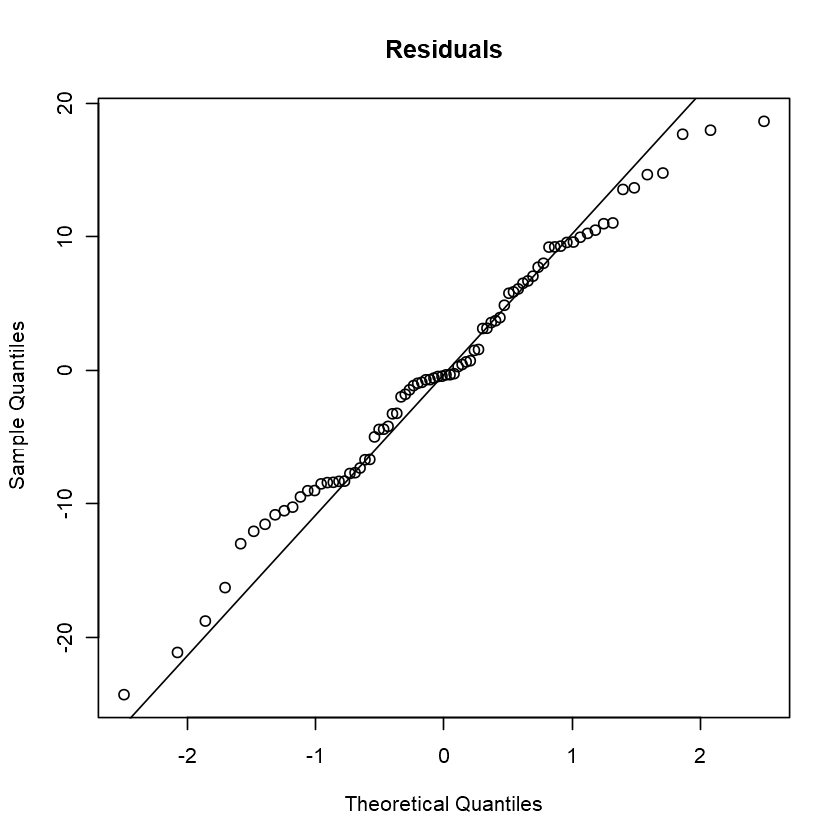

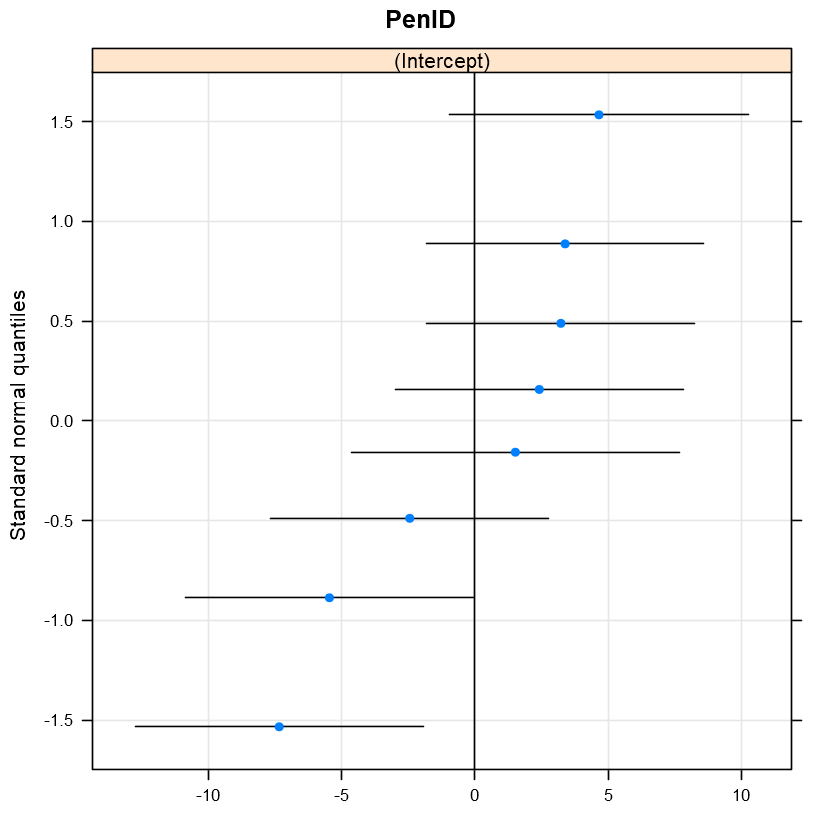

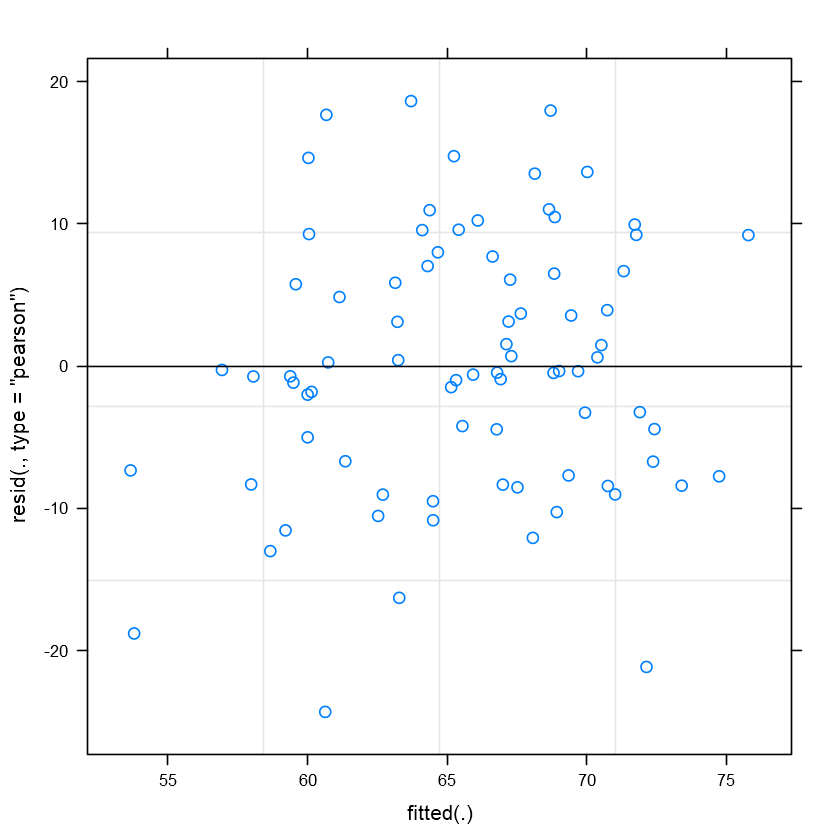

In [4]:
fit = lmerTest::lmer(Feathers ~ InitialWeight_kg + CLASS + Treatment + RPen+ CLASS*Treatment + (1|PenID), data=df)
fit_feather = fit
anova(fit)
effCoef(fit)
qqnorm(resid(fit), main = "Residuals")
qqline(resid(fit))
###### normally of random effects
qqmath(ranef(fit,postVar = TRUE))
######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
plot(fit)

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient



,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
InitialWeight_kg,19.96494,19.964938,1,69.38824,0.08229785,0.7750622
CLASS,130.06274,65.031371,2,68.10709,0.26806706,0.7656597
Treatment,211.61197,211.611974,1,19.61218,0.87228976,0.3616796
RPen,10.19015,5.095074,2,68.68567,0.02100250,0.9792228
CLASS:Treatment,563.56305,281.781524,2,68.17736,1.16153700,0.3191206


(Intercept)         InitialWeight_kg                CLASSMEXP 
              29.4105948                8.5159183                0.7771992 
              CLASSOther            TreatmentTRAN                    RPen2 
              -3.3755221               -4.6934831               -0.5845840 
                   RPen3  CLASSMEXP:TreatmentTRAN CLASSOther:TreatmentTRAN 
              -0.8962059               -7.2966554                5.6600604

Warning message in ranef.merMod(fit, postVar = TRUE):
"'postVar' is deprecated: please use 'condVar' instead"


$PenID


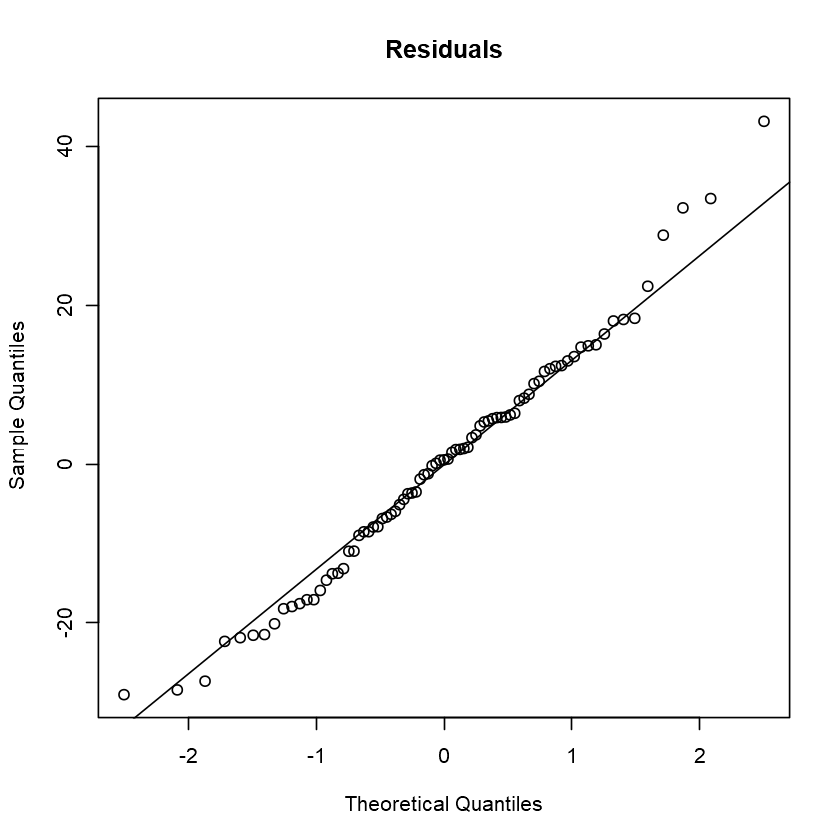

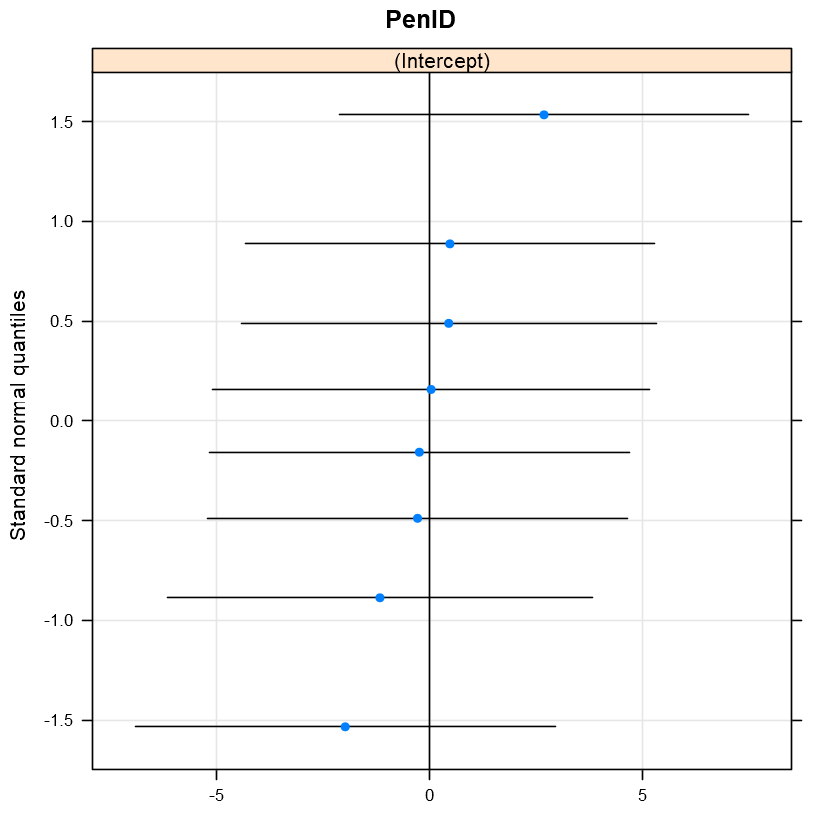

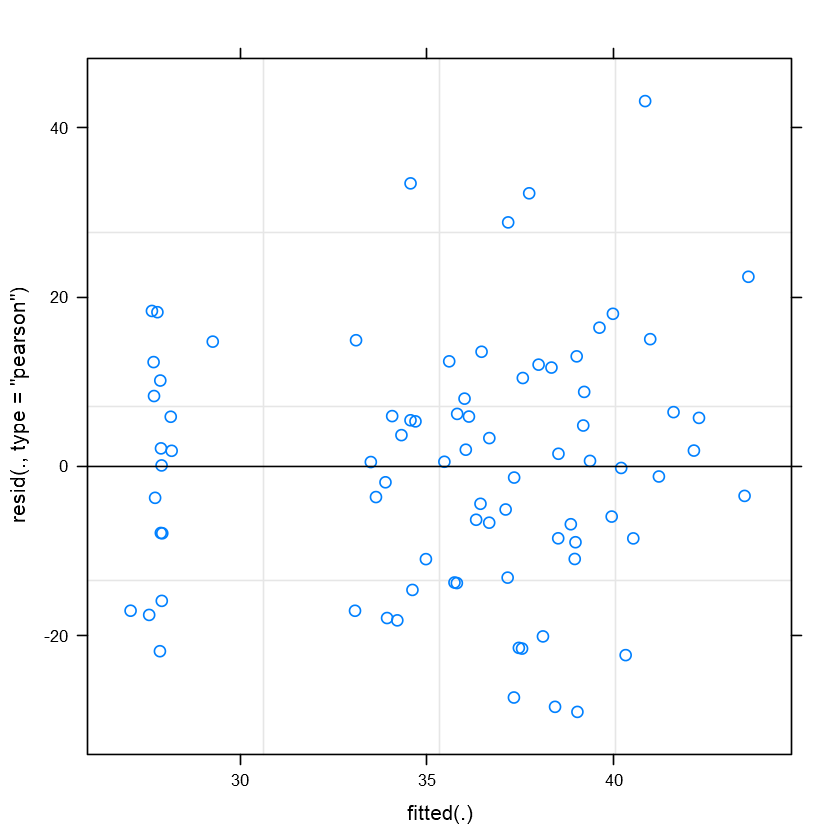

In [5]:
fit = lmerTest::lmer(severity ~ InitialWeight_kg + CLASS + Treatment + RPen + CLASS*Treatment + (1|PenID), data=df)
fit_feather = fit
anova(fit)
effCoef(fit)
qqnorm(resid(fit), main = "Residuals")
qqline(resid(fit))
###### normally of random effects
qqmath(ranef(fit,postVar = TRUE))
######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
plot(fit)

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient



,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
InitialWeight_kg,724916.25,724916.250,1,68.38577,44.2583593,5.828955e-09
CLASS,62192.55,31096.274,2,67.48593,1.8985229,1.577039e-01
Treatment,50383.63,50383.631,1,14.34555,3.0760751,1.007820e-01
RPen,65682.45,32841.227,2,67.92670,2.0050576,1.425442e-01
CLASS:Treatment,18363.29,9181.643,2,67.52628,0.5605675,5.735187e-01


(Intercept)         InitialWeight_kg                CLASSMEXP 
               -33.57337               1631.88876                -56.66206 
              CLASSOther            TreatmentTRAN                    RPen2 
                27.79051                122.20450                -47.05106 
                   RPen3  CLASSMEXP:TreatmentTRAN CLASSOther:TreatmentTRAN 
                70.70344                -10.37341                -74.01156

Warning message in ranef.merMod(fit, postVar = TRUE):
"'postVar' is deprecated: please use 'condVar' instead"


$PenID


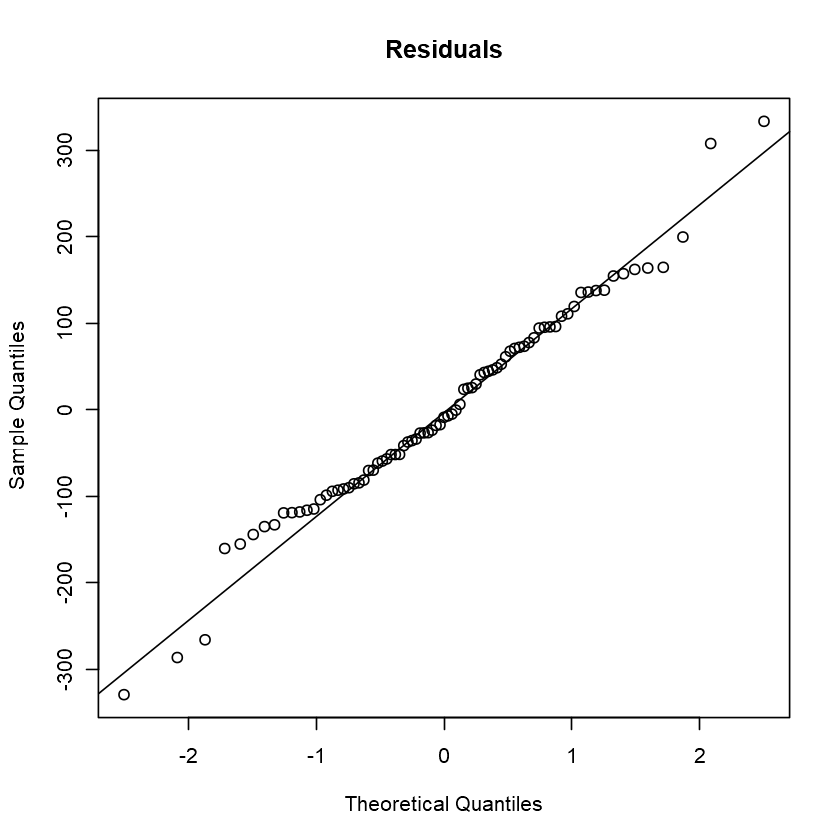

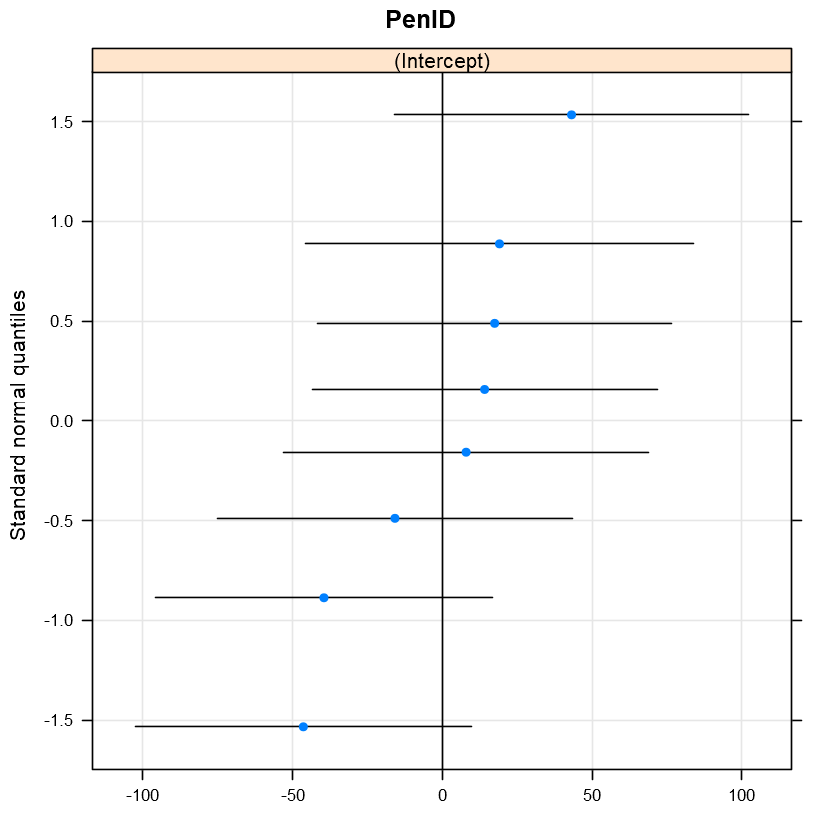

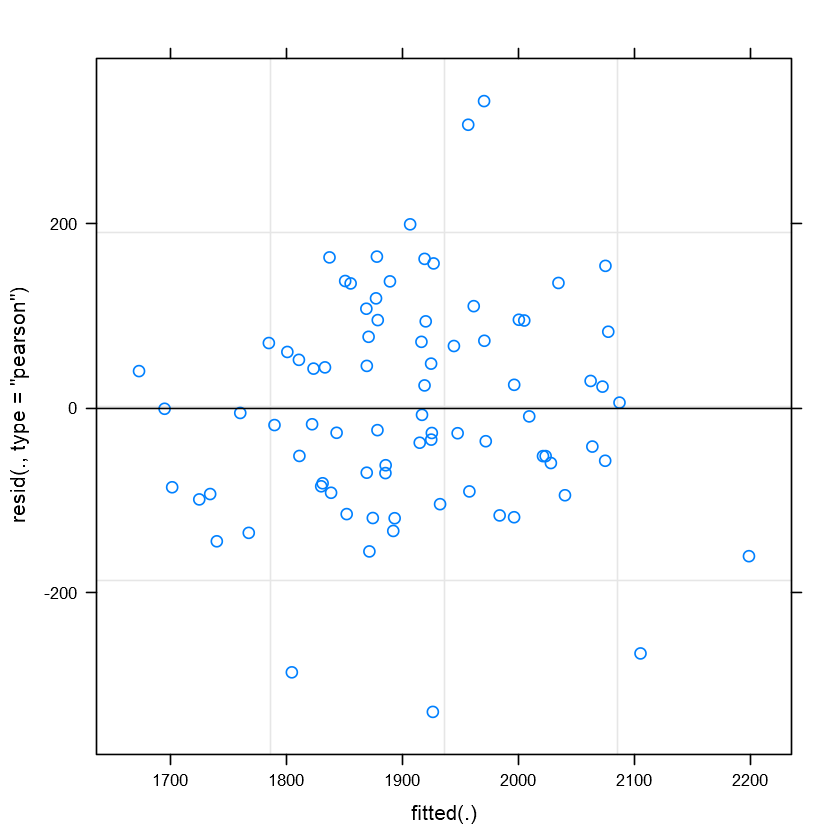

In [6]:
fit = lmerTest::lmer(weight ~ InitialWeight_kg + CLASS + Treatment + RPen + CLASS*Treatment + (1|PenID), data=df)
fit_feather = fit
anova(fit)
effCoef(fit)
qqnorm(resid(fit), main = "Residuals")
qqline(resid(fit))
###### normally of random effects
qqmath(ranef(fit,postVar = TRUE))
######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
plot(fit)

## Feather HA5

#only two groups so treatment as fixed effect (otherwise (1|Treatment/PenID) lead to boundary (singular) fit: see ?isSingular)
#for predictive plot in poster
fit = glmmLasso(severity ~ nbr_first3days_no_mvt + perc_duration_5_Zone_10 + perc_1_Zone_while_WG_open_10 + vertical_travel_distance_perh + BLUP_slopes + Predictability_mean,
                rnd=list(PenID=~1), lambda=10, data=df)
summary(fit)

In [5]:
head(df,2)

,HenID,perc_1_Zone_while_WG_open,vertical_travel_distance_perh,perc_duration_5_Zone,InitialWeight_kg,RPen,nbr_first3days_no_mvt,BehaviouralType,BLUP_slopes2,Predictability_mean,PenID,CLASS,Treatment,severity,weight,Feathers,perc_1_Zone_while_WG_open_10,perc_duration_5_Zone_10
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,hen_10,0.000000,1.933333,35,1.070,1,1,-0.3007925,14.794846,1.049111,pen11,LEXP,OFH,40,1713.4,67.00000,0.0000000,3.5
2,hen_101,1.372807,4.000000,10,1.082,3,0,0.6584891,2.281217,1.118694,pen5,MEXP,OFH,28,1755.3,72.66667,0.1372807,1.0


,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
nbr_first3days_no_mvt,24.92931834,24.92931834,1,69.54109,0.2853110902,0.59494458
perc_duration_5_Zone_10,0.09304494,0.09304494,1,65.49844,0.0010648808,0.97406688
perc_1_Zone_while_WG_open_10,396.90963957,396.90963957,1,63.84123,4.5425518842,0.03691812
vertical_travel_distance_perh,8.35235934,8.35235934,1,58.14695,0.0955910915,0.75829123
BLUP_slopes2,425.40335651,425.40335651,1,69.89689,4.8686568076,0.03063643
Predictability_mean,42.40524002,42.40524002,1,71.80533,0.4853195381,0.48827177
BehaviouralType,0.04916979,0.04916979,1,45.65240,0.0005627385,0.98117766


(Intercept)         nbr_first3days_no_mvt 
                  68.63462301                    0.73968228 
      perc_duration_5_Zone_10  perc_1_Zone_while_WG_open_10 
                   0.03284435                    4.34481796 
vertical_travel_distance_perh                  BLUP_slopes2 
                  -0.56487509                   -0.20744961 
          Predictability_mean               BehaviouralType 
                  -3.37893888                    0.14499929

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: Feathers ~ nbr_first3days_no_mvt + perc_duration_5_Zone_10 +  
    perc_1_Zone_while_WG_open_10 + vertical_travel_distance_perh +  
    BLUP_slopes2 + Predictability_mean + BehaviouralType + (1 |      PenID)
   Data: df

REML criterion at convergence: 569.7

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.29994 -0.57363  0.05707  0.67103  2.03066 

Random effects:
 Groups   Name        Variance Std.Dev.
 PenID    (Intercept) 27.51    5.245   
 Residual             87.38    9.348   
Number of obs: 80, groups:  PenID, 8

Fixed effects:
                              Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)                   68.63462    8.24152 68.55396   8.328 5.26e-12 ***
nbr_first3days_no_mvt          0.73968    1.38480 69.54109   0.534   0.5949    
perc_duration_5_Zone_10        0.03284    1.00649 65.49844   0.033   0.9741    
perc_1_Zone_while_WG_open

Warning message in ranef.merMod(fit, postVar = TRUE):
"'postVar' is deprecated: please use 'condVar' instead"


$PenID


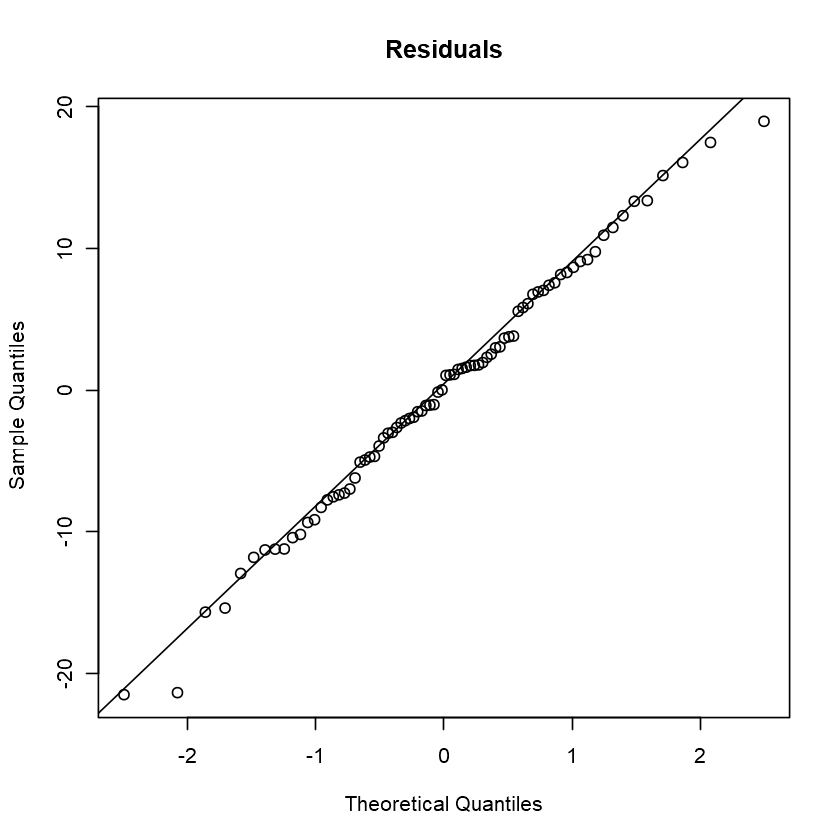

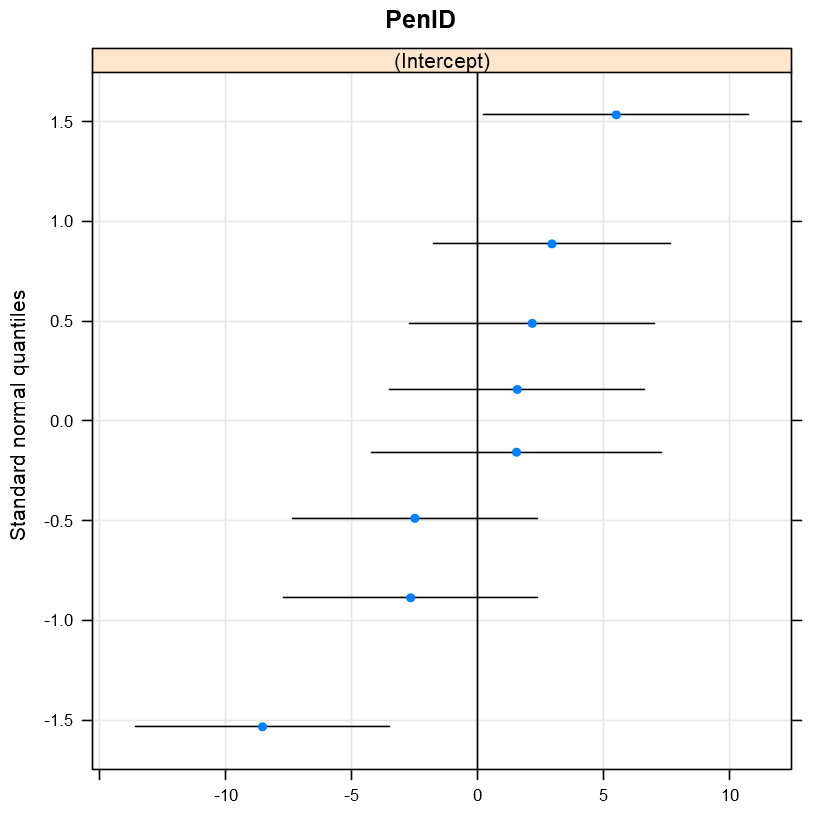

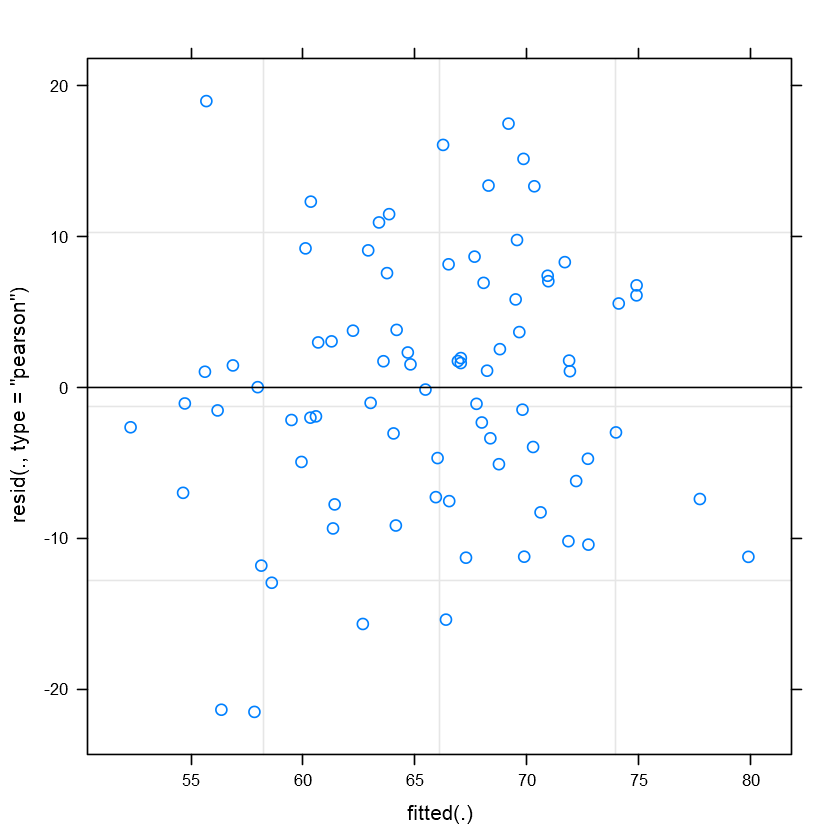

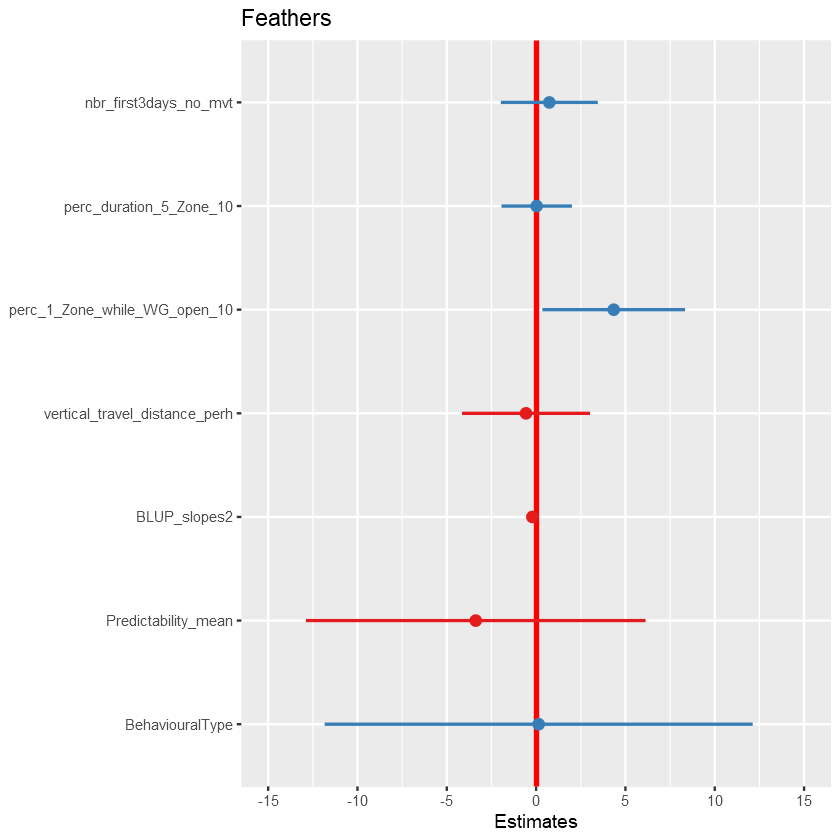

In [6]:
#only two groups so treatment as fixed effect (otherwise (1|Treatment/PenID) lead to boundary (singular) fit: see ?isSingular)
#for predictive plot in poster
fit = lmerTest::lmer(Feathers ~ nbr_first3days_no_mvt + perc_duration_5_Zone_10 + perc_1_Zone_while_WG_open_10 + vertical_travel_distance_perh + BLUP_slopes2 + Predictability_mean +BehaviouralType+ (1|PenID), 
           data=df)
fit_feather = fit
anova(fit)
effCoef(fit)

#capture.output(summary(fit), file=file.path(path_,paste(name,'.txt', sep='')), append=TRUE)
summary(fit) #, default: ddf = "Satterthwaite", other: "Kenward-Roger"
#Assumptions
###### normally distributed residuals
#qqmath(fit, id=0.05)
qqnorm(resid(fit), main = "Residuals")
qqline(resid(fit))
###### normally of random effects
qqmath(ranef(fit,postVar = TRUE))
######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
plot(fit)

#plot estimates
plot_model(fit, vline.color = "red")

In [7]:
#profile likelihood confidence intervals
confint(fit_feather)

Computing profile confidence intervals ...



,2.5 %,97.5 %
.sig01,1.9145482,9.38813391
.sigma,7.6372380,10.60809630
(Intercept),53.2299285,84.29566344
nbr_first3days_no_mvt,-1.8517457,3.41144798
perc_duration_5_Zone_10,-1.8527425,1.95608492
perc_1_Zone_while_WG_open_10,0.5088431,8.15502409
vertical_travel_distance_perh,-4.0307505,2.86261484
BLUP_slopes2,-0.3846993,-0.02947492
Predictability_mean,-12.6505646,5.69502800
BehaviouralType,-11.3958806,11.69611422


In [8]:
tab_model(fit, file=file.path(path_,'LMERFeather.html'))
# then take this html file and make .png file
webshot(file.path(path_,'LMERFeather.html'), file.path(path_,'LMERFeather.png'), zoom=3, cliprect = c(0, 5, 600, 270))

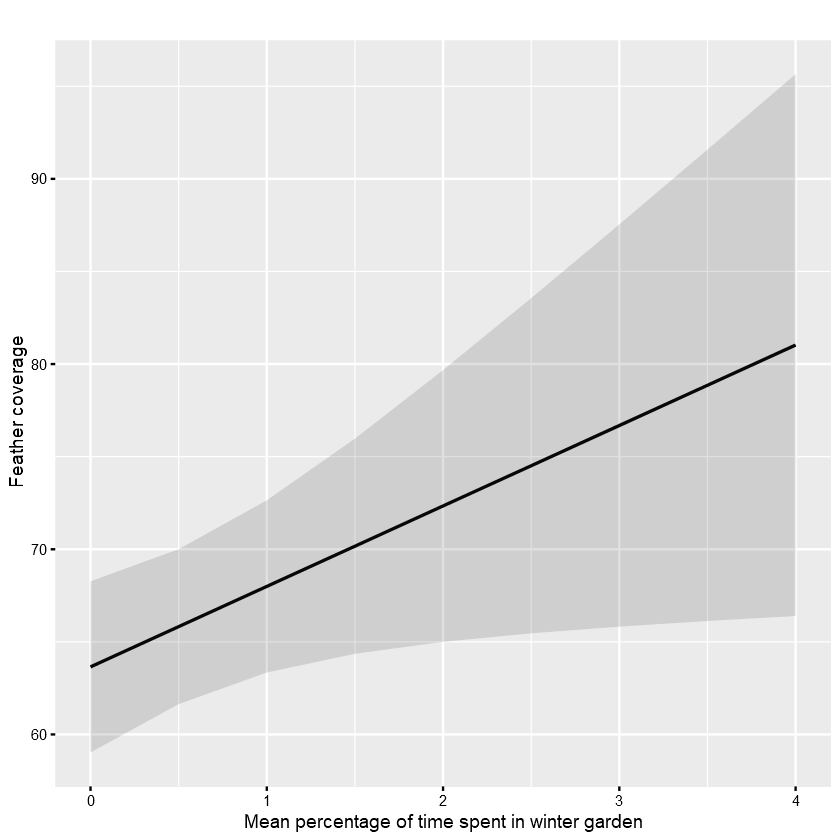

In [9]:
sjPlot::plot_model(fit, type = "pred", terms = c("perc_1_Zone_while_WG_open_10"), title='')+ xlab("Mean percentage of time spent in winter garden")+ylab('Feather coverage')+
      theme(plot.background = element_rect(fill = "transparent",colour = NA),
           axis.text.x = element_text(color="black"), axis.ticks = element_line(color = "black"),
           axis.text.y = element_text(color="black"))
ggsave(file.path(path_,'Feather_WG_pred.png'), width=4, height=4, bg = "transparent")

Warning message:
"Removed 1 rows containing missing values (geom_point)."
Warning message:
"Removed 1 rows containing missing values (geom_point)."


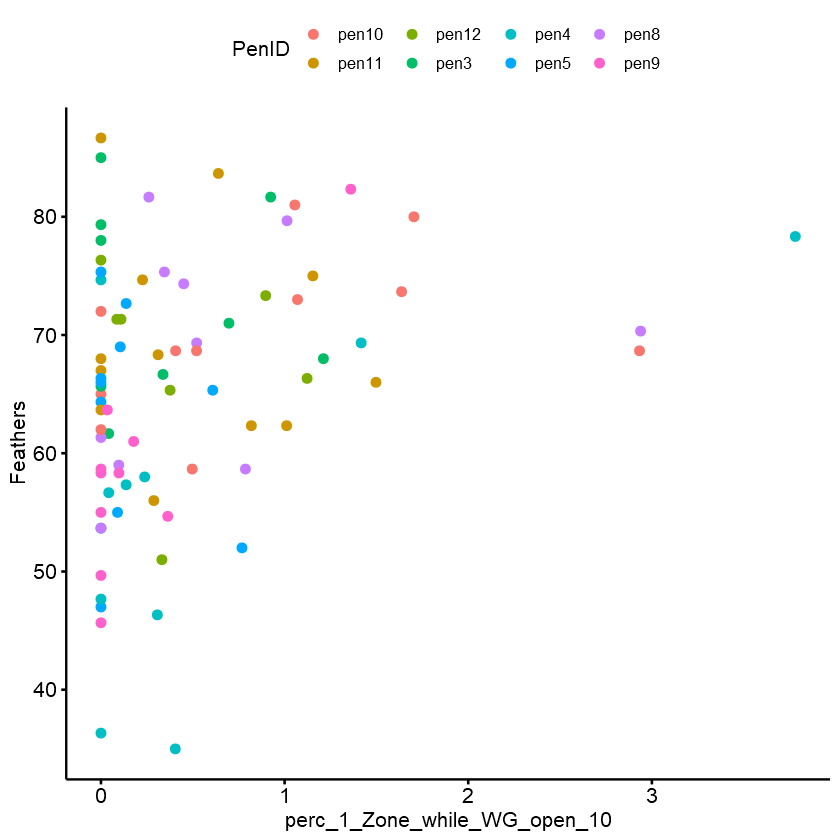

In [10]:
ggscatter(df, x = "perc_1_Zone_while_WG_open_10", y = "Feathers",color = "PenID")
ggsave(file.path(path_,'Feather_WG_scatter.png'),width=5, height=5)

p1 = sjPlot::plot_model(fit, type = "pred", terms = c("mean_perc_duration_3_Zone"), title='')+xlab("Mean percentage of time spent in Lower perch")+ylab('Feather coverage')+ylab('Feather coverage') +
      theme(plot.background = element_rect(fill = "transparent",colour = NA), 
            axis.text.x = element_text(color="black"), axis.ticks = element_line(color = "black"),
           axis.text.y = element_text(color="black"))+ ylim(75, 100)

p2 = sjPlot::plot_model(fit, type = "pred", terms = c("nbr_days_4zonevisited"), title='')+ xlab("Number of the first 3 days with 4 zone visited")+ylab('Feather coverage')+
      theme(plot.background = element_rect(fill = "transparent",colour = NA),
            axis.text.x = element_text(color="black"), axis.ticks = element_line(color = "black"),
           axis.text.y = element_text(color="black"))+ ylim(75, 100)

p3 = sjPlot::plot_model(fit, type = "pred", terms = c("mean_percentage_time_outside_while_WG_open"), title='')+ xlab("Mean percentage of time spent in winter garden")+ylab('Feather coverage')+
      theme(plot.background = element_rect(fill = "transparent",colour = NA),
           axis.text.x = element_text(color="black"), axis.ticks = element_line(color = "black"),
           axis.text.y = element_text(color="black"))+ ylim(75, 100)

p = plot_grid(p3,p2,p1, ncol=3, nrow=1)
title = ggdraw() + draw_label("Predicted Value of Feather Coverage (higher values indicate more feathers present) from LMER", fontface='bold')
plot_grid(title, p, ncol=1, rel_heights=c(0.1, 1)) # rel_heights values control title margins

ggsave(file.path(path_adapt,'PRED_Feather_ALL.png'),width=12, height=4, bg = "transparent")

## Severity HA5

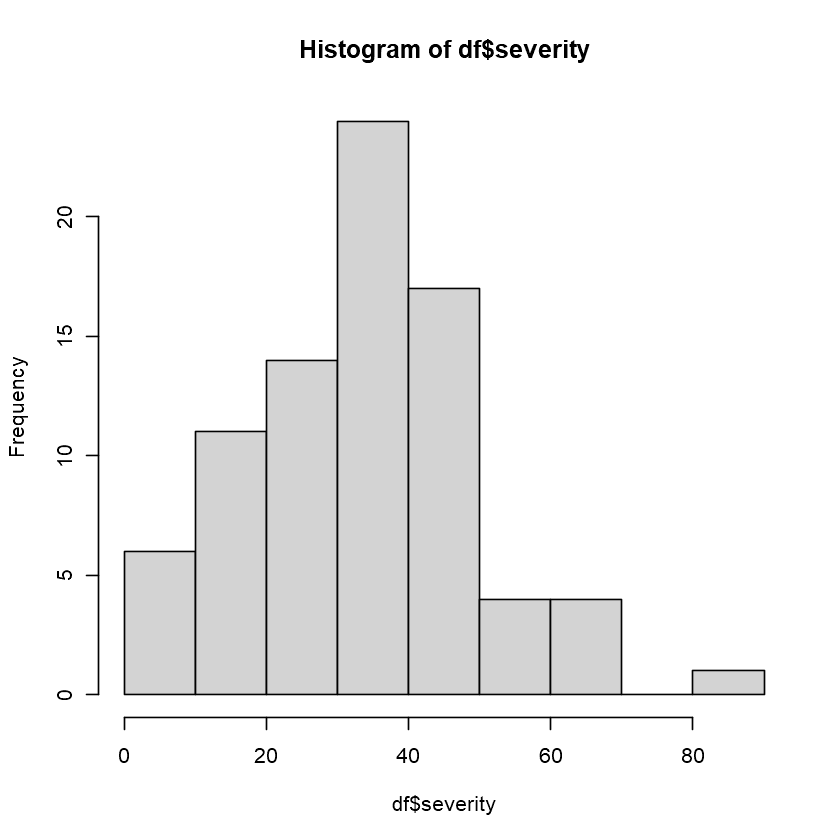

In [11]:
hist(df$severity)

boundary (singular) fit: see ?isSingular



,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
nbr_first3days_no_mvt,1207.74632,1207.74632,1,73,5.4400081,0.02244117
perc_duration_5_Zone_10,22.80795,22.80795,1,73,0.1027330,0.74948992
perc_1_Zone_while_WG_open_10,107.24603,107.24603,1,73,0.4830644,0.48924398
vertical_travel_distance_perh,858.16302,858.16302,1,73,3.8653927,0.05309483
BLUP_slopes2,1003.86701,1003.86701,1,73,4.5216819,0.03684904
Predictability_mean,794.05348,794.05348,1,73,3.5766264,0.06256576
BehaviouralType,496.96030,496.96030,1,73,2.2384403,0.13892776


(Intercept)         nbr_first3days_no_mvt 
                   62.5268263                     4.9147538 
      perc_duration_5_Zone_10  perc_1_Zone_while_WG_open_10 
                    0.4354644                    -1.8650320 
vertical_travel_distance_perh                  BLUP_slopes2 
                   -4.5784543                    -0.3010083 
          Predictability_mean               BehaviouralType 
                  -13.2008028                    10.5287907

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: severity ~ nbr_first3days_no_mvt + perc_duration_5_Zone_10 +  
    perc_1_Zone_while_WG_open_10 + vertical_travel_distance_perh +  
    BLUP_slopes2 + Predictability_mean + BehaviouralType + (1 |      PenID)
   Data: df

REML criterion at convergence: 636.5

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.82519 -0.72803  0.02423  0.65387  2.70763 

Random effects:
 Groups   Name        Variance Std.Dev.
 PenID    (Intercept)   0       0.0    
 Residual             222      14.9    
Number of obs: 81, groups:  PenID, 8

Fixed effects:
                              Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)                    62.5268    11.5724  73.0000   5.403 7.85e-07 ***
nbr_first3days_no_mvt           4.9148     2.1072  73.0000   2.332   0.0224 *  
perc_duration_5_Zone_10         0.4355     1.3586  73.0000   0.321   0.7495    
perc_1_Zone_while_WG_open

Warning message in ranef.merMod(fit, postVar = TRUE):
"'postVar' is deprecated: please use 'condVar' instead"


$PenID


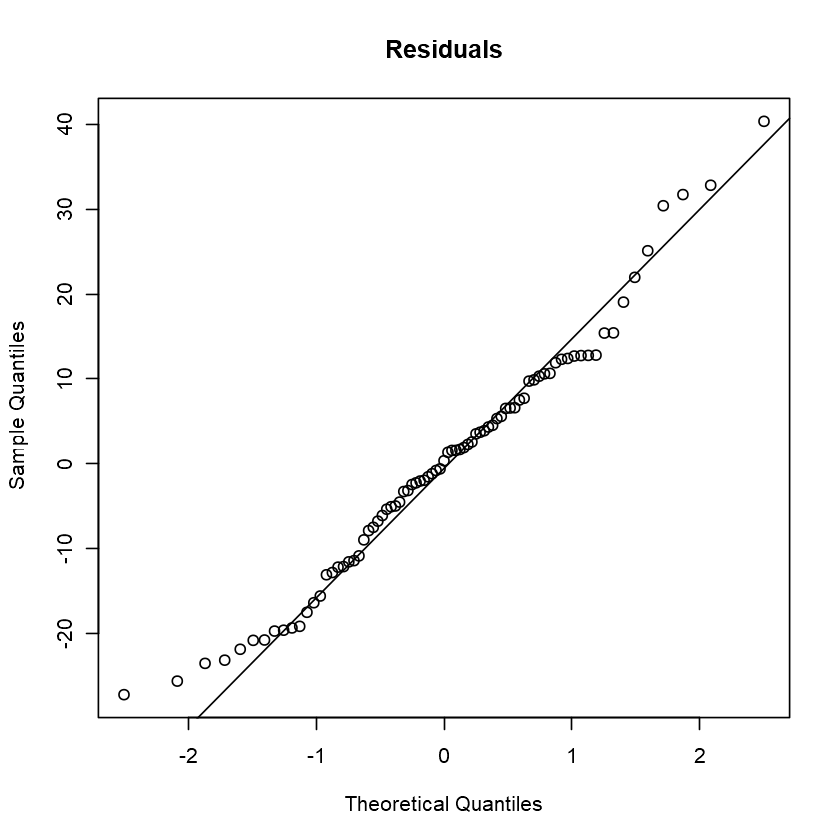

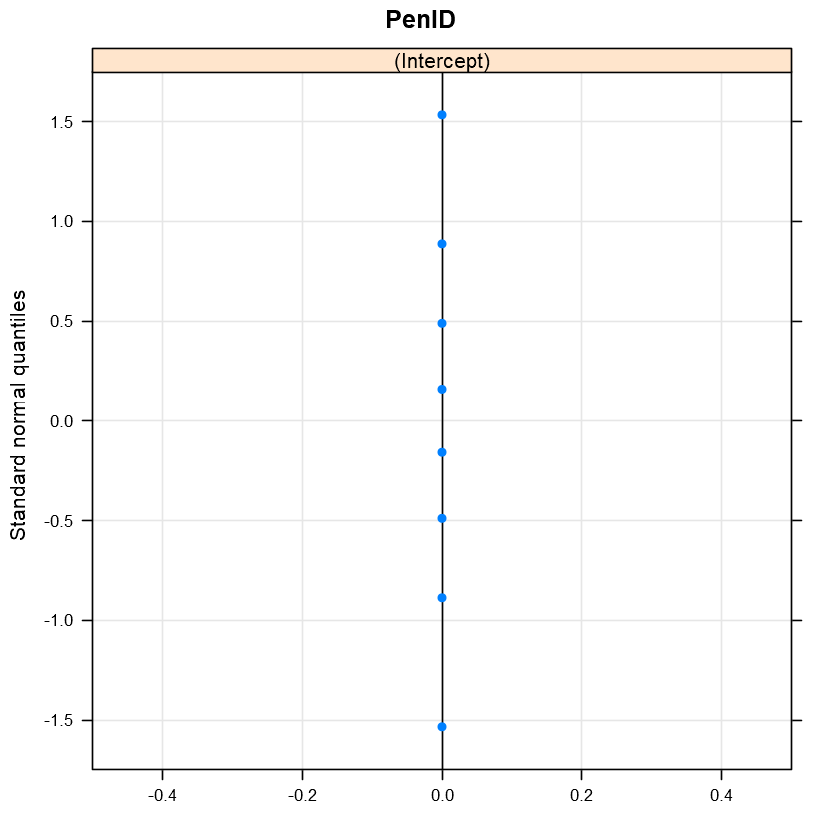

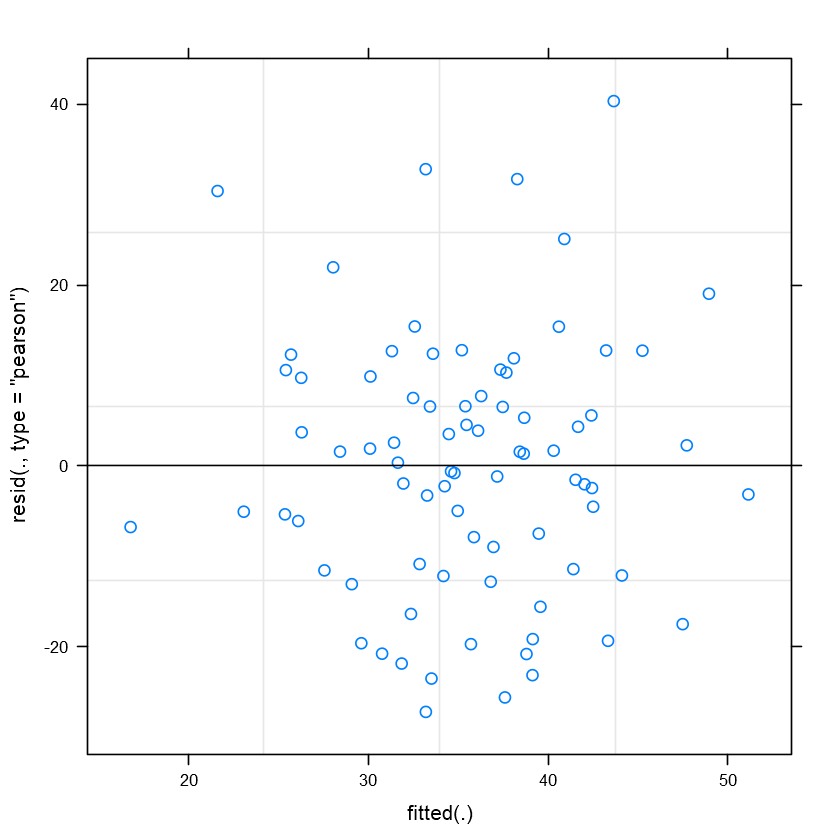

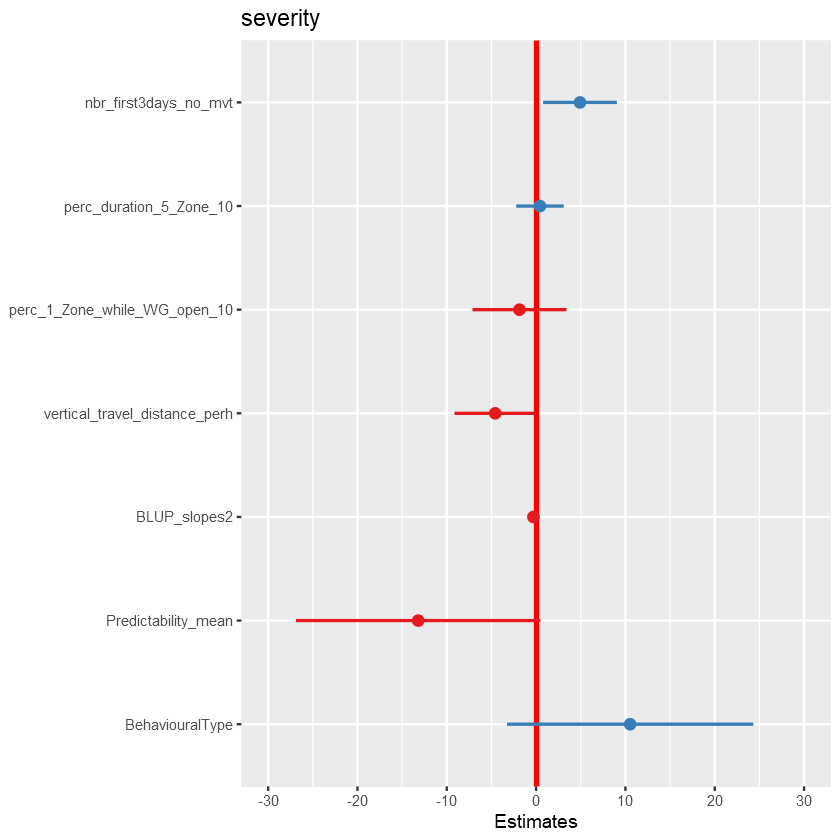

In [12]:
#only two groups so treatment as fixed effect (otherwise (1|Treatment/PenID) lead to boundary (singular) fit: see ?isSingular)
fit = lmerTest::lmer(severity ~ nbr_first3days_no_mvt + perc_duration_5_Zone_10 + perc_1_Zone_while_WG_open_10 + vertical_travel_distance_perh + BLUP_slopes2 + Predictability_mean +BehaviouralType + (1|PenID), 
           data=df)
fit_severity = fit
anova(fit)
effCoef(fit)

#capture.output(summary(fit), file=file.path(path_,paste(name,'.txt', sep='')), append=TRUE)
summary(fit)
#Assumptions
###### normally distributed residuals
#qqmath(fit, id=0.05)
qqnorm(resid(fit), main = "Residuals")
qqline(resid(fit))
###### normally of random effects
qqmath(ranef(fit,postVar = TRUE))
######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
plot(fit)

#plot estimates
plot_model(fit, vline.color = "red")

In [13]:
tab_model(fit, file=file.path(path_,'LMERSEVERITY.html'))
# then take this html file and make .png file
webshot(file.path(path_,'LMERSEVERITY.html'), file.path(path_,'LMERSEVERITY.png'), zoom=3, cliprect = c(0, 5, 600, 270))

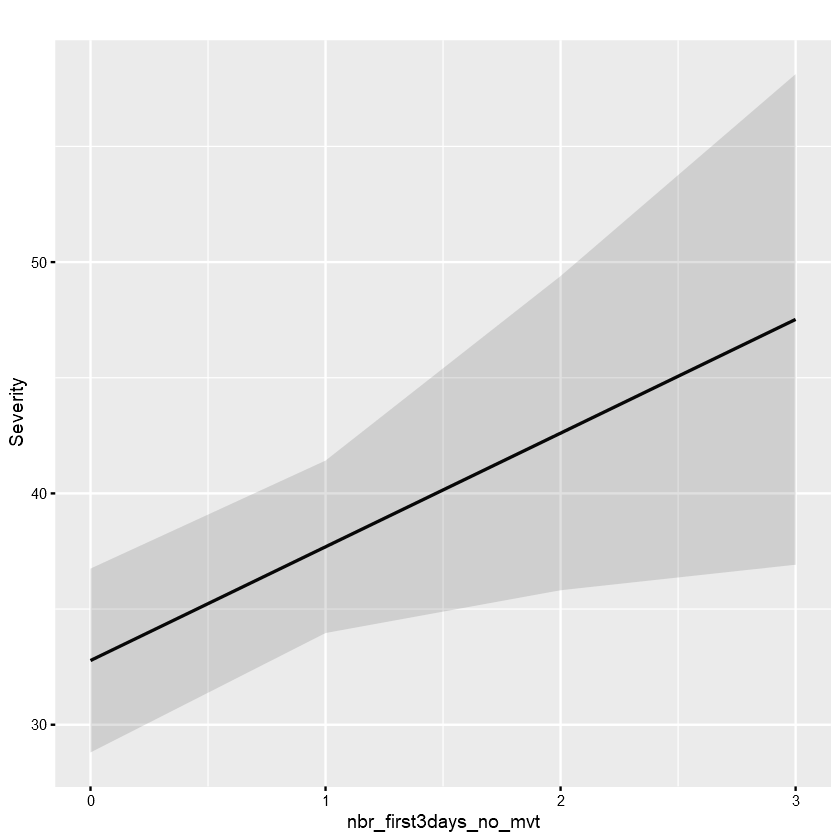

In [14]:
sjPlot::plot_model(fit, type = "pred", terms = c("nbr_first3days_no_mvt"), title='')+ xlab("nbr_first3days_no_mvt")+ylab('Severity')+
      theme(plot.background = element_rect(fill = "transparent",colour = NA),
           axis.text.x = element_text(color="black"), axis.ticks = element_line(color = "black"),
           axis.text.y = element_text(color="black"))
ggsave(file.path(path_,'Severity_nbr_days_nomvt_pred.png'), width=4, height=4, bg = "transparent")

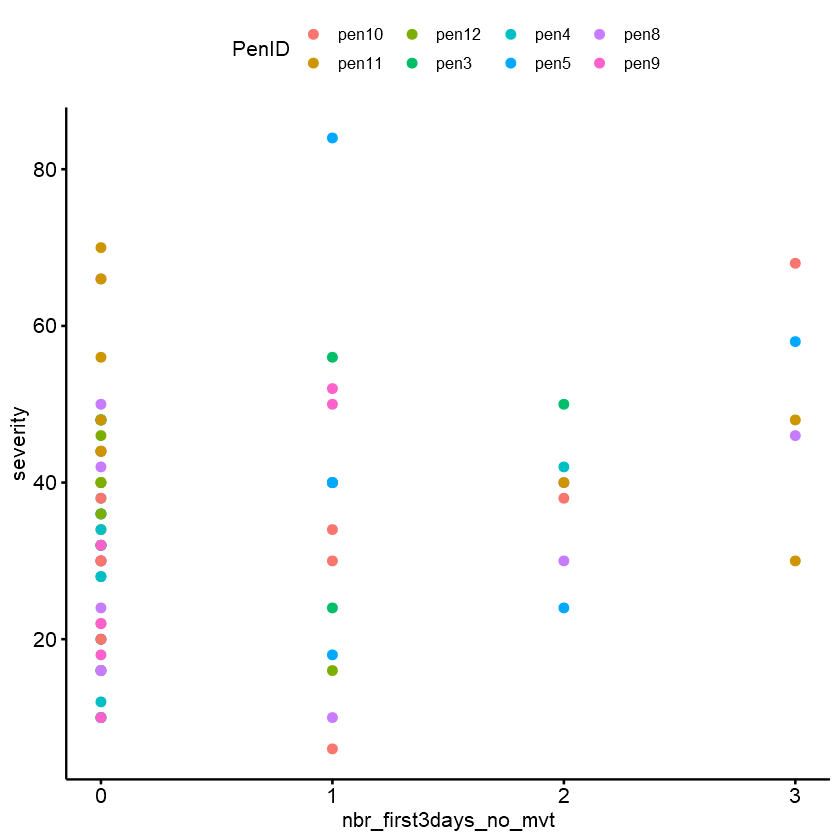

In [15]:
ggscatter(df, x = "nbr_first3days_no_mvt", y = "severity",color = "PenID")
ggsave(file.path(path_,'Severity_nbr_days_nomvt_scatter.png'),width=5, height=5)

# Weight

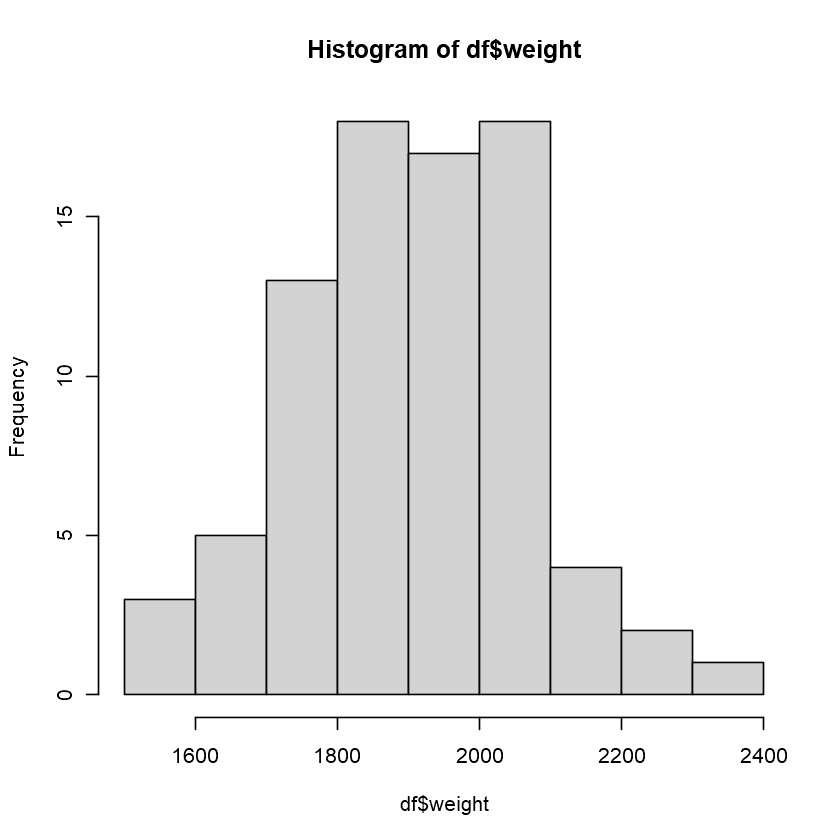

In [16]:
hist(df$weight)

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
InitialWeight_kg,478444.8354,478444.8354,1,69.91502,32.15422653,2.966700e-07
nbr_first3days_no_mvt,31368.7706,31368.7706,1,71.95120,2.10816061,1.508621e-01
perc_duration_5_Zone_10,9647.9871,9647.9871,1,53.44744,0.64839986,4.242532e-01
perc_1_Zone_while_WG_open_10,31926.9676,31926.9676,1,45.00443,2.14567464,1.499236e-01
vertical_travel_distance_perh,191.8251,191.8251,1,39.62758,0.01289174,9.101743e-01
BLUP_slopes2,9001.4922,9001.4922,1,71.97247,0.60495171,4.392442e-01
Predictability_mean,40956.2727,40956.2727,1,68.38160,2.75249553,1.016829e-01
BehaviouralType,37636.8296,37636.8296,1,21.18224,2.52940998,1.265570e-01


(Intercept)              InitialWeight_kg 
                  534.7762978                  1327.6214730 
        nbr_first3days_no_mvt       perc_duration_5_Zone_10 
                  -26.1923335                    -9.6567363 
 perc_1_Zone_while_WG_open_10 vertical_travel_distance_perh 
                  -35.2013403                    -2.4130864 
                 BLUP_slopes2           Predictability_mean 
                   -0.9454813                  -100.1261936 
              BehaviouralType 
                 -107.4598471

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
weight ~ InitialWeight_kg + nbr_first3days_no_mvt + perc_duration_5_Zone_10 +  
    perc_1_Zone_while_WG_open_10 + vertical_travel_distance_perh +  
    BLUP_slopes2 + Predictability_mean + BehaviouralType + (1 |      PenID)
   Data: df

REML criterion at convergence: 933.1

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.76466 -0.62519  0.03832  0.82230  2.02632 

Random effects:
 Groups   Name        Variance Std.Dev.
 PenID    (Intercept)  1177     34.3   
 Residual             14880    122.0   
Number of obs: 81, groups:  PenID, 8

Fixed effects:
                               Estimate Std. Error        df t value Pr(>|t|)
(Intercept)                    534.7763   294.4668   69.5153   1.816   0.0737
InitialWeight_kg              1327.6215   234.1290   69.9150   5.670 2.97e-07
nbr_first3days_no_mvt          -26.1923    18.0394   71.9512  -1.452   0.1509
perc_duration_5

Warning message in ranef.merMod(fit, postVar = TRUE):
"'postVar' is deprecated: please use 'condVar' instead"


$PenID


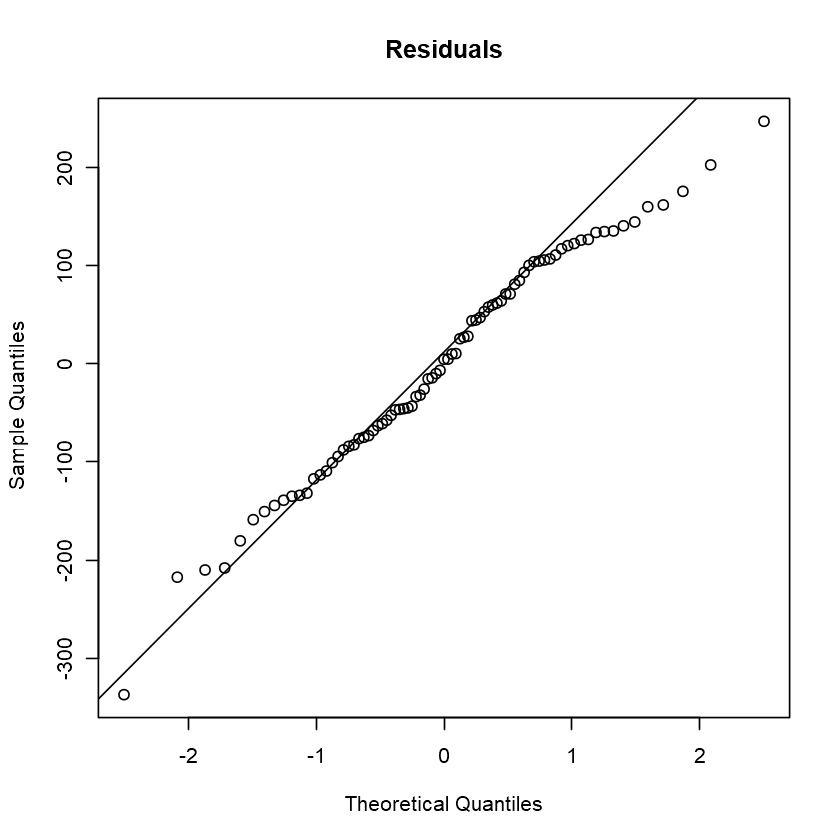

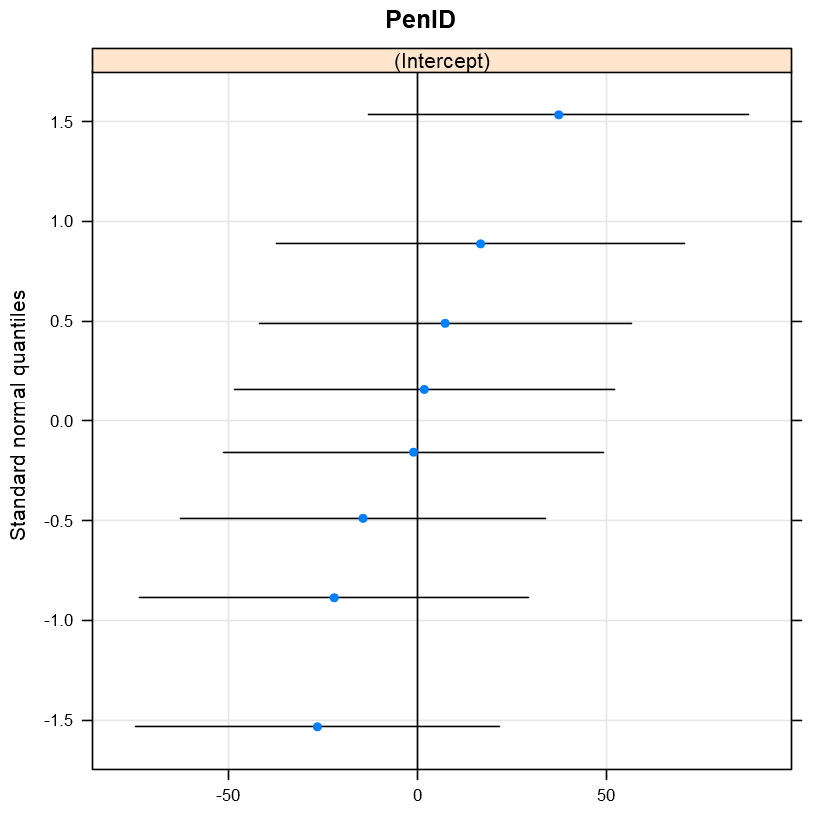

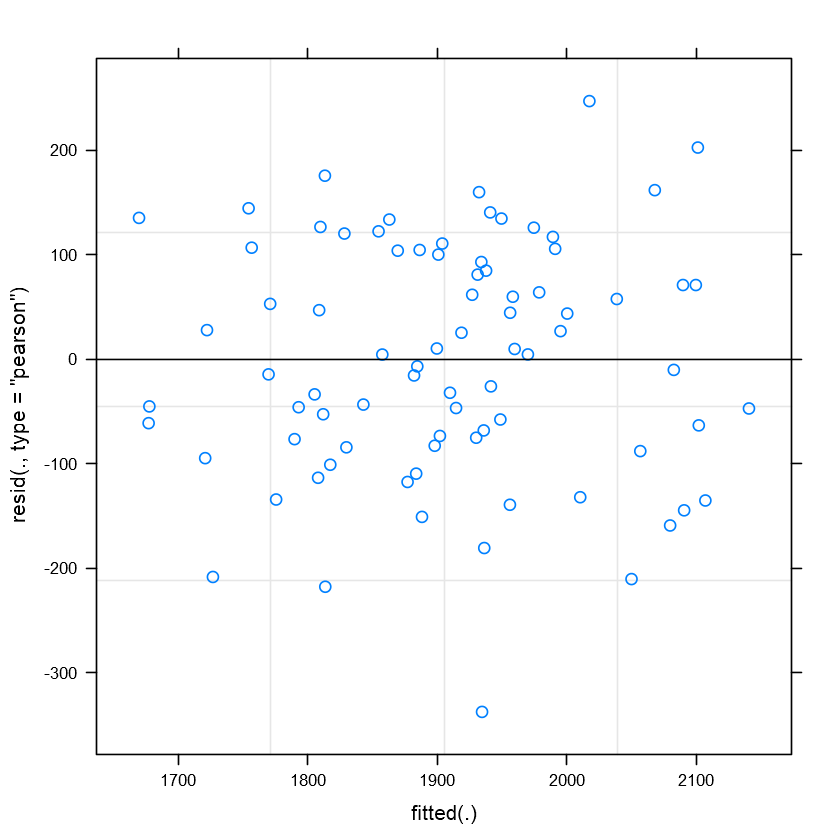

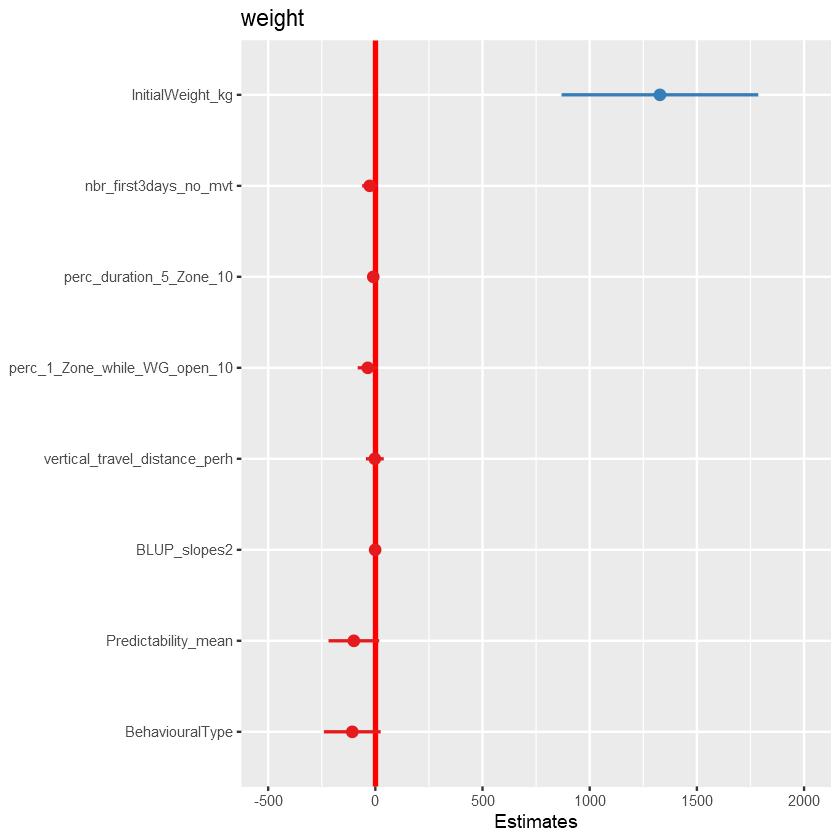

In [18]:
#only two groups so treatment as fixed effect (otherwise (1|Treatment/PenID) lead to boundary (singular) fit: see ?isSingular)
fit = lmerTest::lmer(weight ~ InitialWeight_kg + nbr_first3days_no_mvt + perc_duration_5_Zone_10 + perc_1_Zone_while_WG_open_10 + vertical_travel_distance_perh + BLUP_slopes2 + Predictability_mean +BehaviouralType+ (1|PenID), 
           data=df)
fit_weight = fit
anova(fit)
effCoef(fit)

#capture.output(summary(fit), file=file.path(path_,paste(name,'.txt', sep='')), append=TRUE)
summary(fit)
#Assumptions
###### normally distributed residuals
#qqmath(fit, id=0.05)
qqnorm(resid(fit), main = "Residuals")
qqline(resid(fit))
###### normally of random effects
qqmath(ranef(fit,postVar = TRUE))
######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
plot(fit)

#plot estimates
plot_model(fit, vline.color = "red")

In [20]:
tab_model(fit, file=file.path(path_,'LMERWEIGHT.html'))
# then take this html file and make .png file
webshot(file.path(path_,'LMERWEIGHT.html'), file.path(path_,'LMERWEIGHT.png'), zoom=3, cliprect = c(0, 5, 600, 270))

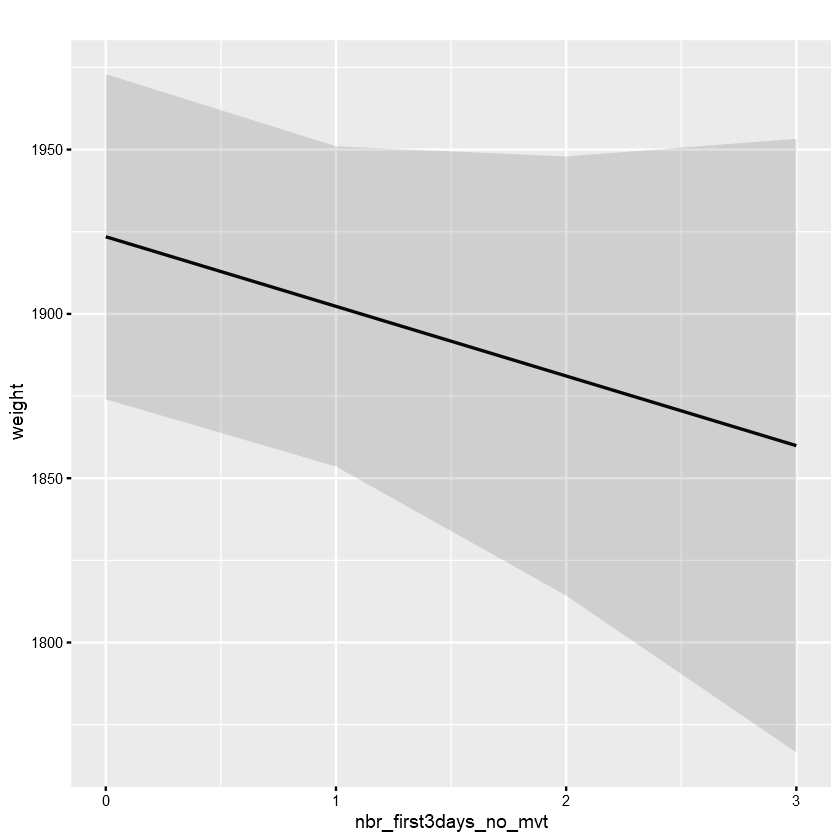

In [21]:
sjPlot::plot_model(fit, type = "pred", terms = c("nbr_first3days_no_mvt"), title='')+ #xlab("Mean percentage of time spent in winter garden")+ylab('Feather coverage')+
      theme(plot.background = element_rect(fill = "transparent",colour = NA),
           axis.text.x = element_text(color="black"), axis.ticks = element_line(color = "black"),
           axis.text.y = element_text(color="black"))
ggsave(file.path(path_,'Weight_nbr_days_nomvt_pred.png'), width=4, height=4, bg = "transparent")

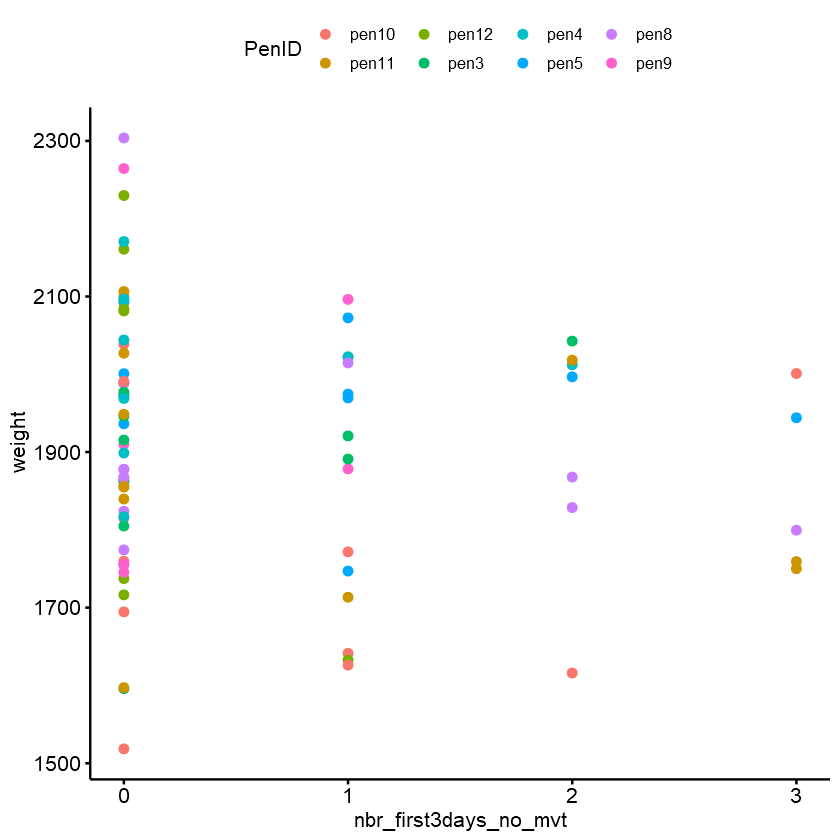

In [22]:
ggscatter(df, x = "nbr_first3days_no_mvt", y = "weight",color = "PenID")
ggsave(file.path(path_,'Weight_nbr_days_nomvt.png'),width=5, height=5)

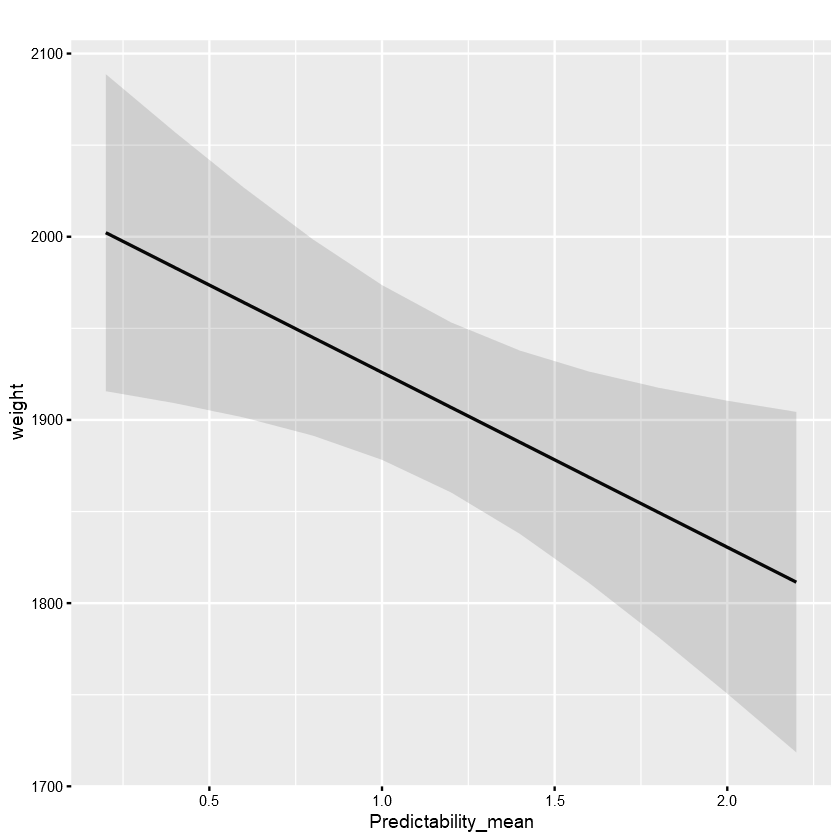

In [23]:
sjPlot::plot_model(fit, type = "pred", terms = c("Predictability_mean"), title='')+ #xlab("Mean percentage of time spent in winter garden")+ylab('Feather coverage')+
      theme(plot.background = element_rect(fill = "transparent",colour = NA),
           axis.text.x = element_text(color="black"), axis.ticks = element_line(color = "black"),
           axis.text.y = element_text(color="black"))
ggsave(file.path(path_,'Weight_nPredictability_mean_pred.png'), width=4, height=4, bg = "transparent")

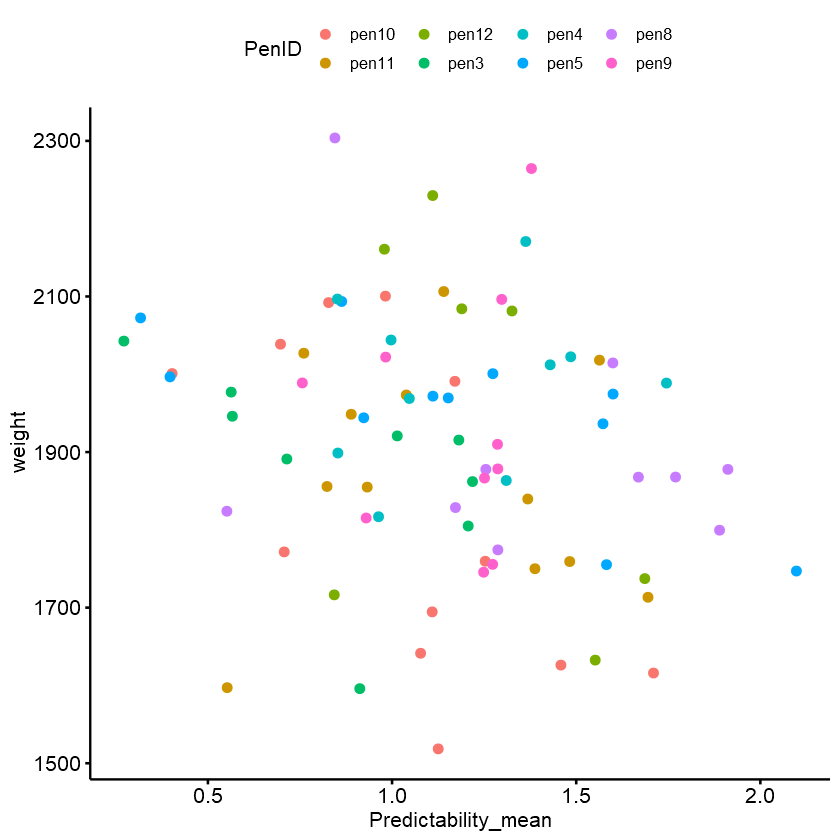

In [24]:
ggscatter(df, x = "Predictability_mean", y = "weight",color = "PenID")
ggsave(file.path(path_,'Weight_Predictability_mean.png'),width=5, height=5)

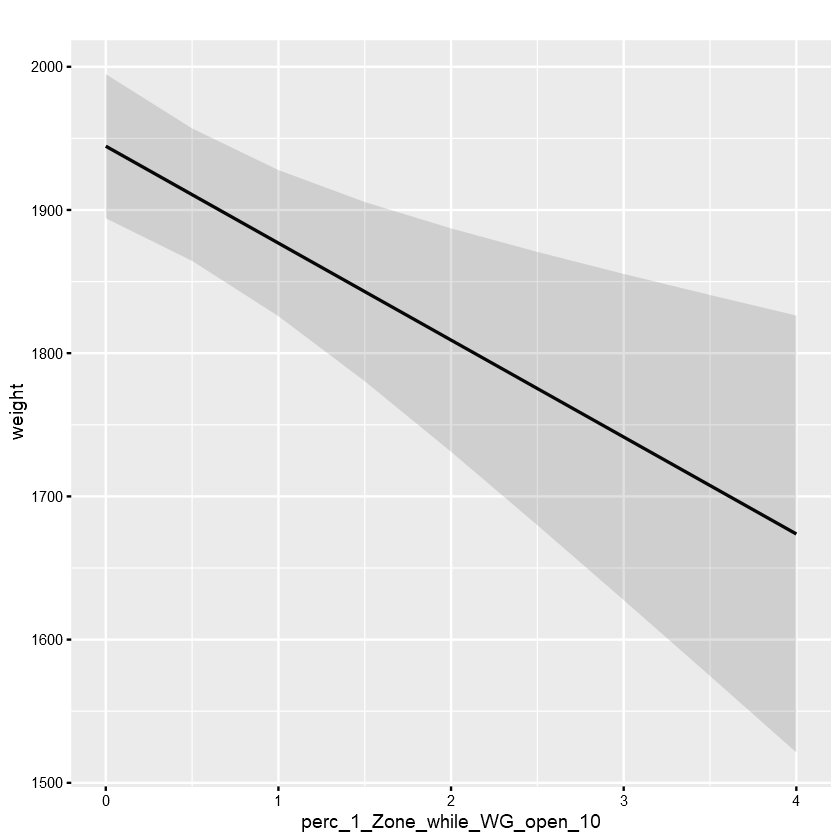

In [25]:
sjPlot::plot_model(fit, type = "pred", terms = c("perc_1_Zone_while_WG_open_10"), title='')+ #xlab("Mean percentage of time spent in winter garden")+ylab('Feather coverage')+
      theme(plot.background = element_rect(fill = "transparent",colour = NA),
           axis.text.x = element_text(color="black"), axis.ticks = element_line(color = "black"),
           axis.text.y = element_text(color="black"))
ggsave(file.path(path_,'Weight_nperc_1_Zone_while_WG_open_pred.png'), width=4, height=4, bg = "transparent")

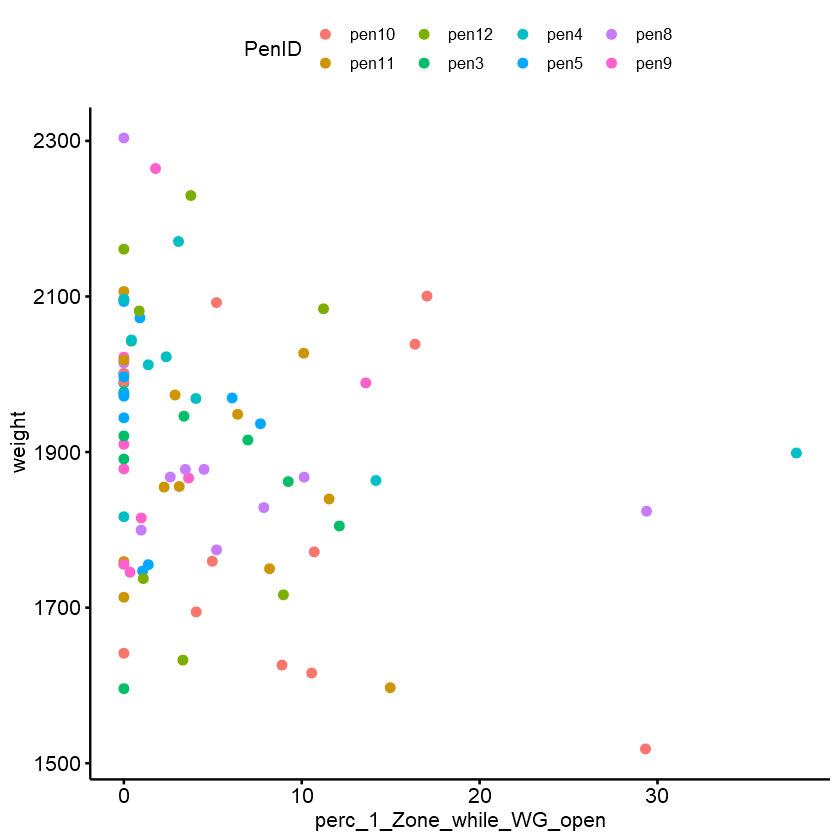

In [26]:
ggscatter(df, x = "perc_1_Zone_while_WG_open", y = "weight",color = "PenID")
ggsave(file.path(path_,'Weight_perc_1_Zone_while_WG_open.png'),width=5, height=5)